In [79]:
import numpy as np
import pandas as pd
import sklearn as svm  #support vector machine
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.cluster import KMeans


# visual your data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [80]:
dataset = pd.read_csv("cars (dataset for k means).csv")
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,Toyota
1,31.9,4,89.0,71,NaN,14,1980,Honda
2,17.0,8,302.0,140,3449.0,11,1971,Toyota
3,15.0,8,400.0,150,3761.0,10,1971,Toyota
4,30.5,4,98.0,63,2051.0,17,1978,Toyota


mpg             0
 cylinders      0
 cubicinches    2
 hp             0
 weightlbs      4
 time-to-60     0
 year           0
 brand          0
dtype: int64

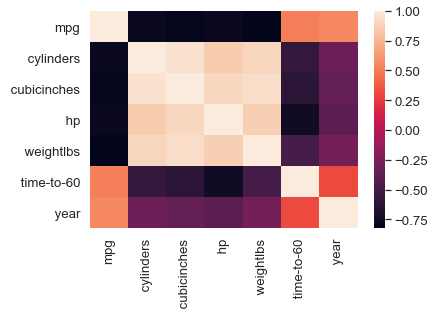

In [96]:
### Heat map
sns.heatmap(dataset.corr())

### This looks how many empty spaces are in the table.
dataset.isnull().sum()  

#one more way to check for null data
#for i in dataset.columns:
 #   print(dataset[i].isnull().sum())

#one more way to check for null data
#dataset.isnull().sum()
#np.where(pd.isnull(dataset))

In [97]:
### If there are empty spaces, run these comands

dataset1=dataset[dataset.columns[:-1]]

for i in dataset1.columns :
    dataset1[i] = dataset1[i].fillna(int(dataset1[i].mean()))
    #print(dataset[i])

dataset1.isnull().sum()

<ipython-input-97-04680ee6e1cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1[i] = dataset1[i].fillna(int(dataset1[i].mean()))


mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
dtype: int64

In [98]:
# Select X and y
X = dataset1.iloc[:, :].values    
y = dataset.iloc[:, -1:].values

# Transforming text to an array of number
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
#print(y)

C:\Users\ap114\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\ap114\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


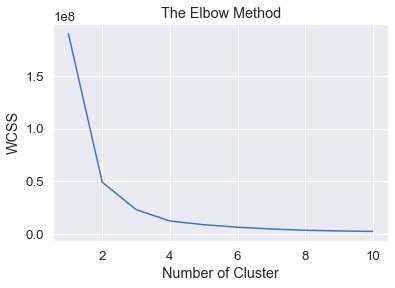

In [99]:
# Find the elbow that in this case is = 3  , therefore we will initiate "n_clusters=3" 
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  # this is a toll to get the centroinds. the number can be modified
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [100]:
### Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)

### Apply k-means to the cars dataset to generate PREDICTED data

model = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
model.fit(X_train, y_train)   # predictions

y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[0 0 1 0 2 1 0 1 0 2 0 2 0 1 1 1 1 1 0 2 0 1 2 2 0 1 1 1 1 2 1 2 1 1 2 0 0
 1 2 2]
[2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 0 1 2 0 2 0 1 2 2 2
 2 2 2]


In [101]:
print('Accuracy is =', accuracy_score(y_test, y_pred)*100)
# Confusion matrix
print('\n Confusion matrix is = \n', confusion_matrix(y_test, y_pred))
# Confusion matrix metrics
print('\n Confusion matrix metrix is = \n',classification_report(y_test, y_pred))

Accuracy is = 35.0

 Confusion matrix is = 
 [[ 0  5  0]
 [ 0  3  0]
 [12  9 11]]

 Confusion matrix metrix is = 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.18      1.00      0.30         3
           2       1.00      0.34      0.51        32

    accuracy                           0.35        40
   macro avg       0.39      0.45      0.27        40
weighted avg       0.81      0.35      0.43        40



In [ ]:
###  If needed the train data can be transformed to float32 and also put between  rescheduled 

In [18]:
# This steps transform the data in float32. If needed include it!!!!
#dataset.iloc[:, :-1] = dataset.iloc[:, :-1].apply(pd.to_numeric, errors='coerce', downcast='float')       # convert the object to numeric
#dataset.head()

In [91]:
# Normalize the data from -1 to 1  if needed with this equation
for i in dataset1.columns :
    dataset1[i] = 2*((dataset1[i] - dataset1[i].min(axis = 0)) / (dataset1[i].max(axis = 0) - (dataset1[i].min(axis = 0))))-1
    
dataset1.head()

<ipython-input-91-0eac8141491f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1[i] = 2*((dataset1[i] - dataset1[i].min(axis = 0)) / (dataset1[i].max(axis = 0) - (dataset1[i].min(axis = 0))))-1


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,-0.781421,1.0,0.457364,0.293478,0.534279,-0.529412,-0.833333
1,0.196721,-0.6,-0.891473,-0.728261,-0.171986,-0.294118,0.500000
2,-0.617486,1.0,0.209302,0.021739,0.085106,-0.647059,-1.000000
3,-0.726776,1.0,0.715762,0.130435,0.269504,-0.764706,-1.000000
4,0.120219,-0.6,-0.844961,-0.815217,-0.741135,0.058824,0.166667
